# Clustering of ferroelectric domains
### 2024 Microscopy Hackathon

Authors:  Maddie Van Winkle, Addie Salvador, Arman Ter-Petrosyan, Grace Guinan



## load packages, helper functions

In [1]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import utils

## load and organize data 
(can download using `Materials_Data_hackathon.ipynb`)

In [2]:
filedir = "../../data"
UCparam, imgdata, SBFOdata = utils.load_data(filedir)

In addition to the raw STEM data, the parametrization files yield the information on each unit cell within the data that we can use as a physics-based comparison to ML analyses. For example, I1-5 are intensity of atomic columns, Vol is unit cell volume, Pxy are polarization components, and so on.


### plot ground truth

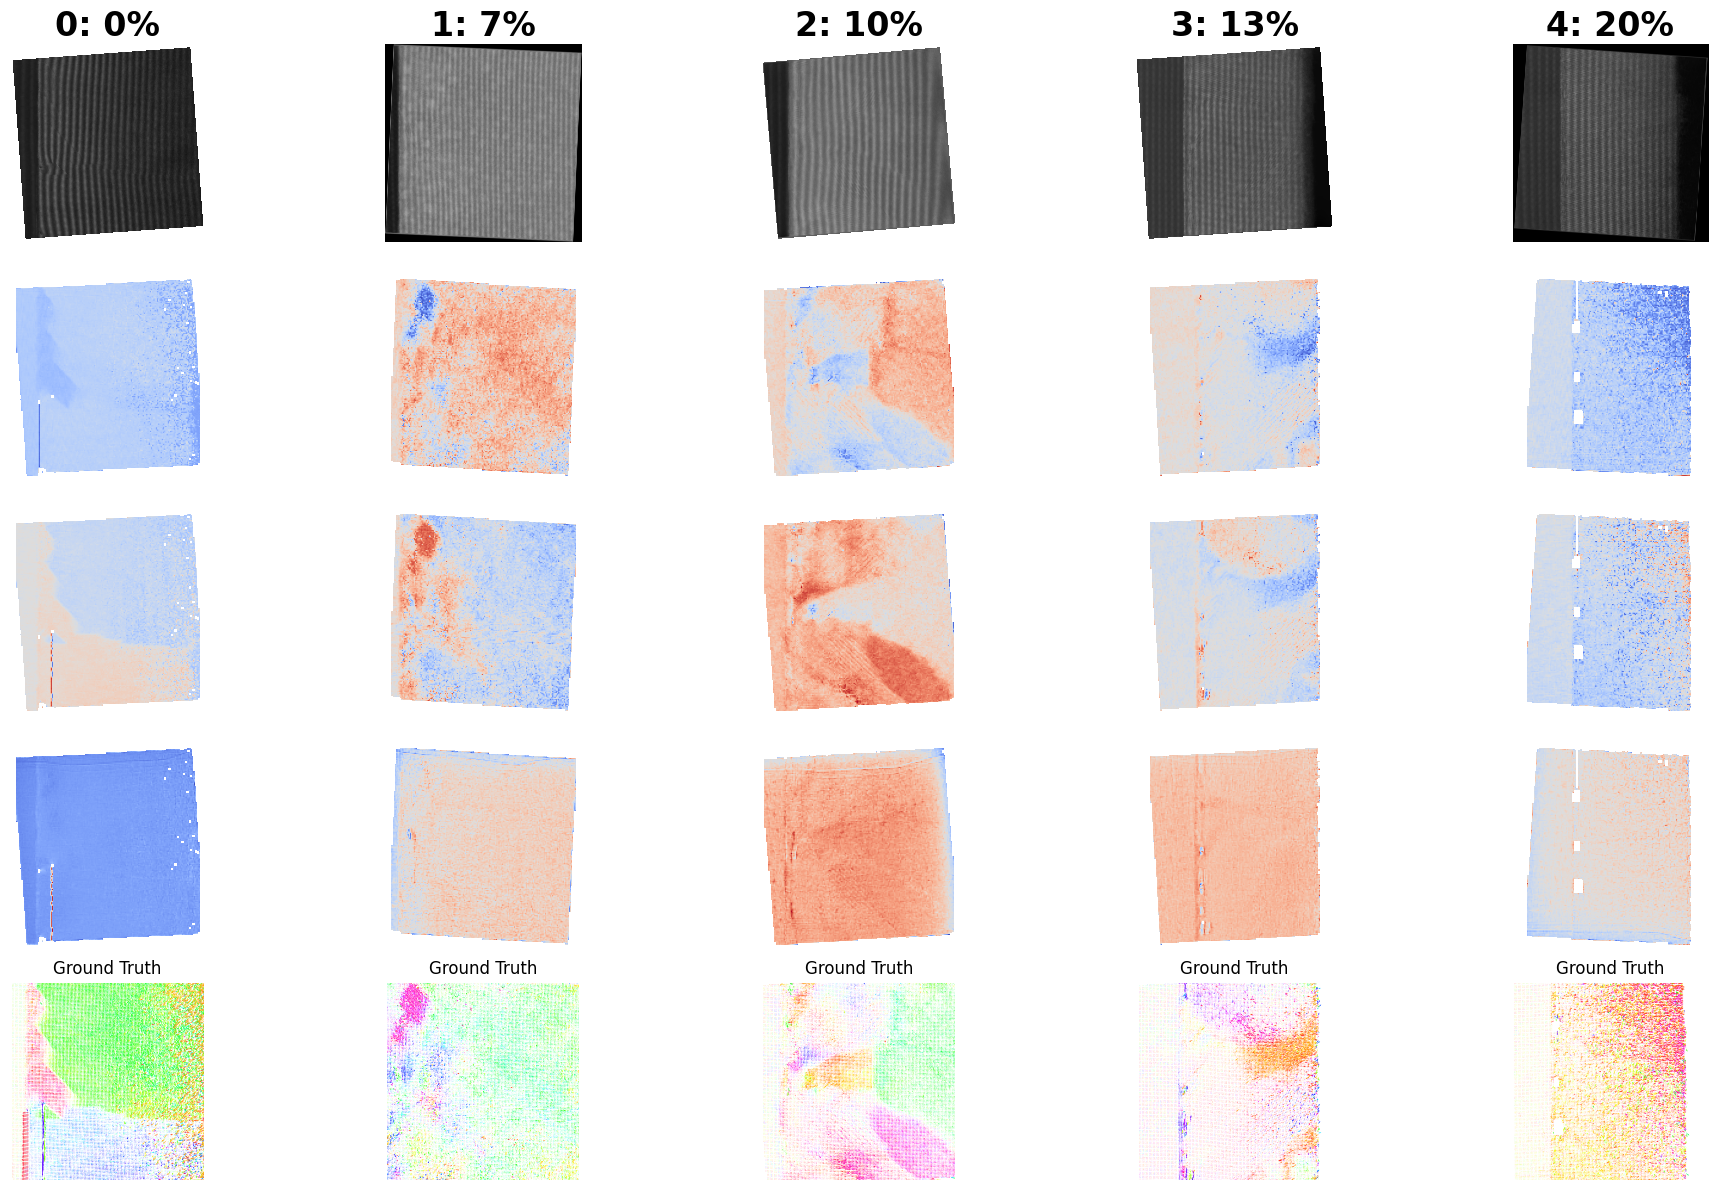

In [3]:
utils.plt_ground_truth(SBFOdata)

## chip image

plot a few example chips

Number of subimages removed due to size mismatch: 231
Number of subimages removed due to NaNs: 160


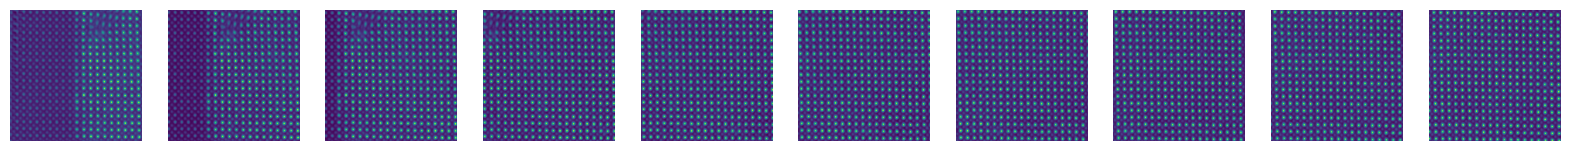

In [4]:
chip_width  = 500
chip_height = 500
step_size   = 100
window_size = (chip_width, chip_height)
img_array   = np.array(imgdata[0])

imstack_grid, com_grid = utils.custom_subimages(img_array, step_size, window_size)

# plot ex chips
fig, ax = plt.subplots(ncols = 10, figsize = (20,20))
for i, image in enumerate(imstack_grid):
    ax[i].imshow(image)
    ax[i].set_axis_off()
    if i == 9:
        break

# 3 Different Clustering Methods

## kmeans (centroid-based clustering method)

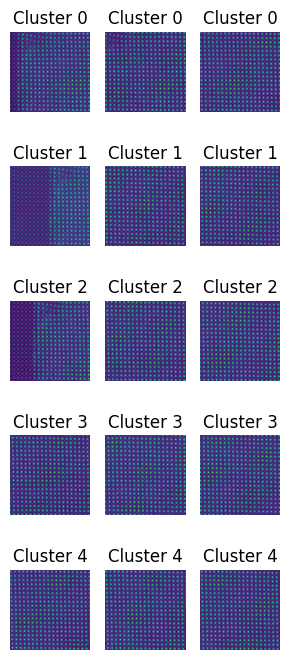

cluster 0 size: 223
cluster 1 size: 269
cluster 2 size: 221
cluster 3 size: 256
cluster 4 size: 240


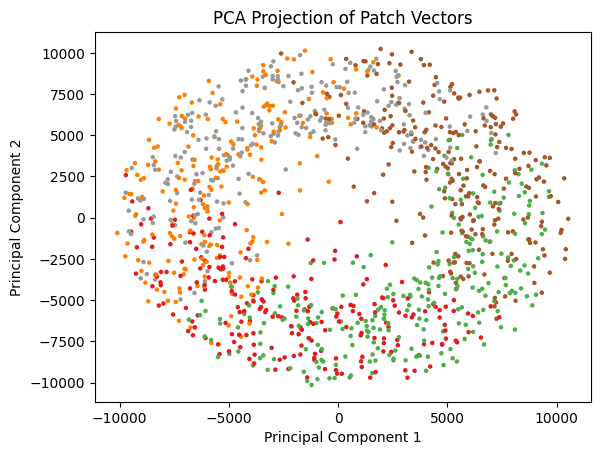

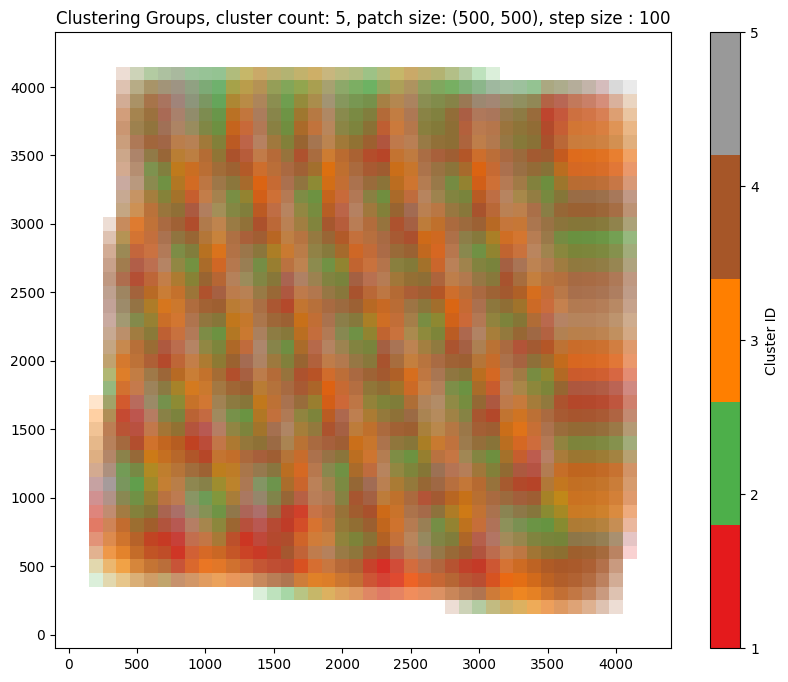

In [5]:
n_clusters = 5
utils.k_means_clustering(imstack_grid, n_clusters, com_grid, window_size, step_size)

#### try a different chip and step sizes

Number of subimages removed due to size mismatch: 1173
Number of subimages removed due to NaNs: 5474


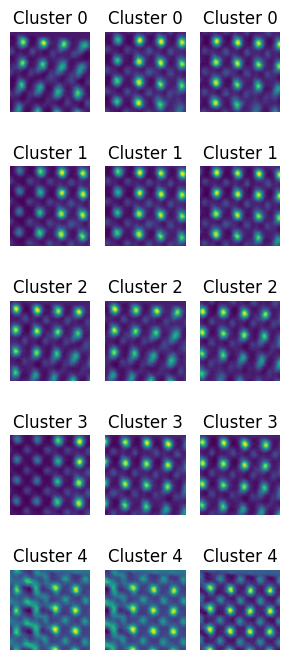

cluster 0 size: 4940
cluster 1 size: 5036
cluster 2 size: 4992
cluster 3 size: 4897
cluster 4 size: 12296


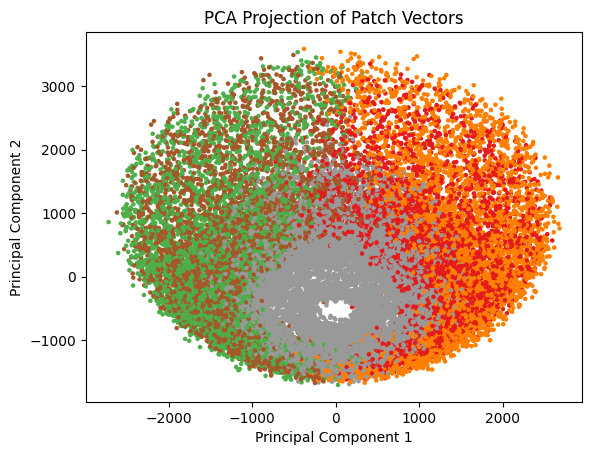

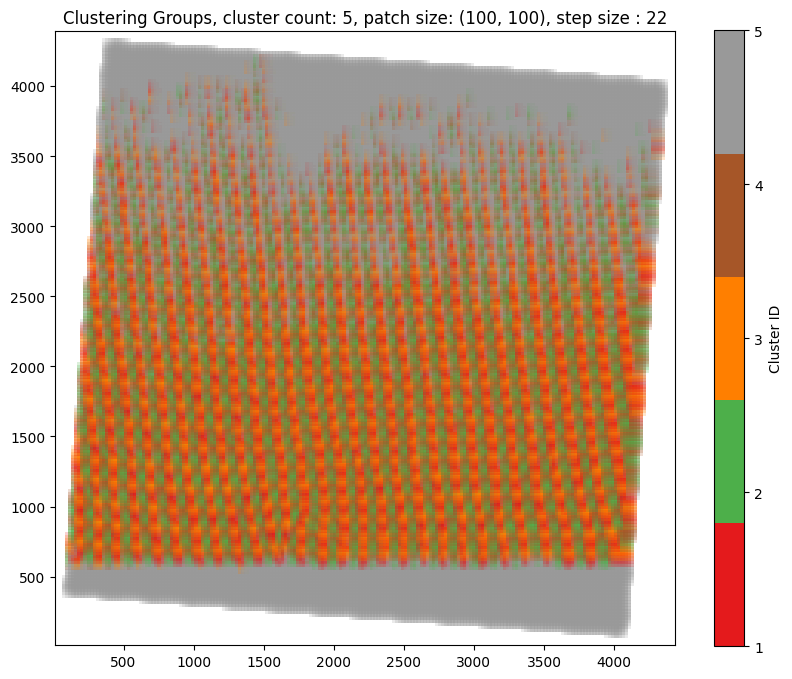

In [6]:
chip_width  = 100
chip_height = 100
step_size   = 22
window_size = (chip_width, chip_height)
img_array   = np.array(imgdata[0])

imstack_grid, com_grid = utils.custom_subimages(img_array, step_size, window_size)
n_clusters = 5
utils.k_means_clustering(imstack_grid, n_clusters, com_grid, window_size, step_size)

Number of subimages removed due to size mismatch: 2622
Number of subimages removed due to NaNs: 29744


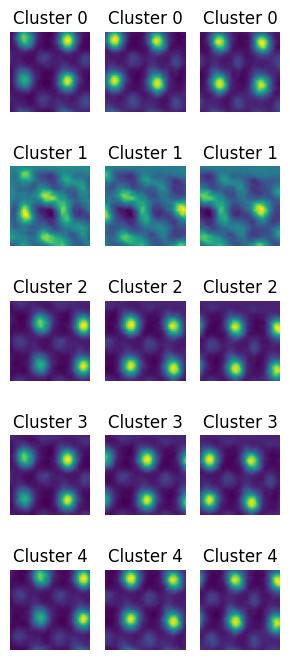

cluster 0 size: 24499
cluster 1 size: 62712
cluster 2 size: 24527
cluster 3 size: 24003
cluster 4 size: 24169


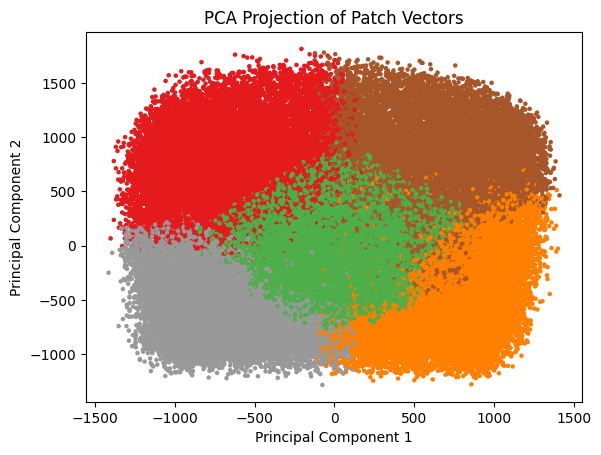

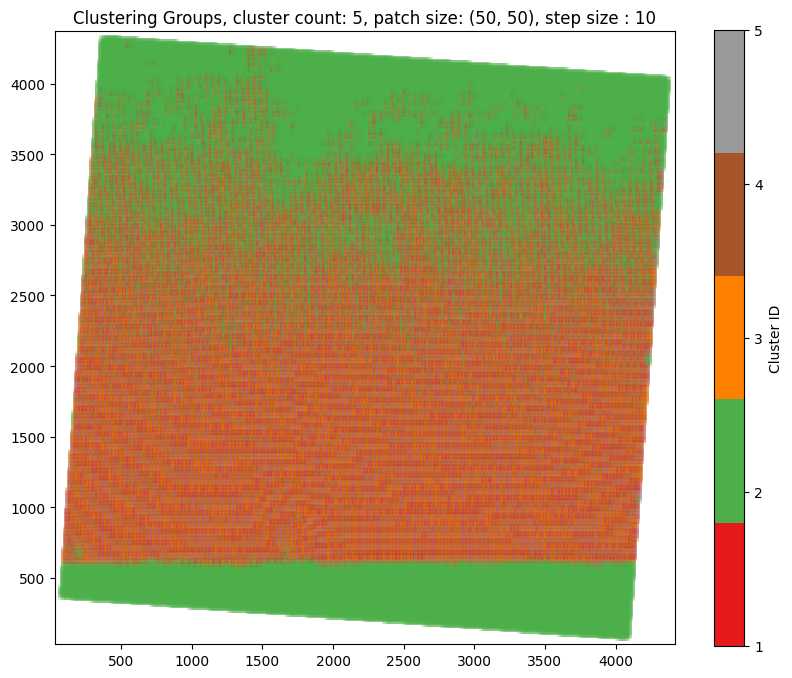

In [7]:
chip_width  = 50
chip_height = 50
step_size   = 10
window_size = (chip_width, chip_height)
img_array   = np.array(imgdata[0])

imstack_grid, com_grid = utils.custom_subimages(img_array, step_size, window_size)
n_clusters = 5
utils.k_means_clustering(imstack_grid, n_clusters, com_grid, window_size, step_size)

## Agglomerative Clustering (connectivity-based clustering method)

Number of subimages removed due to size mismatch: 231
Number of subimages removed due to NaNs: 160


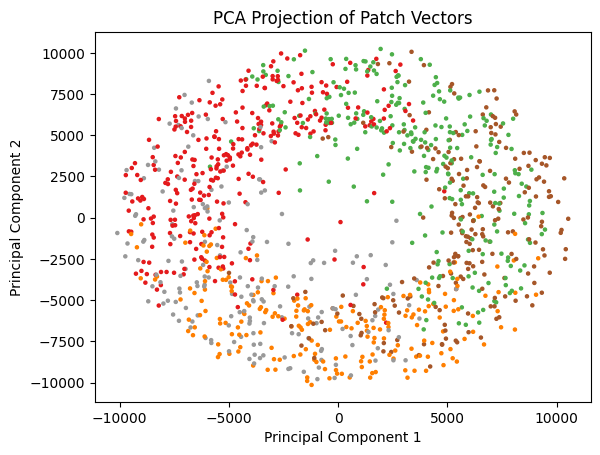

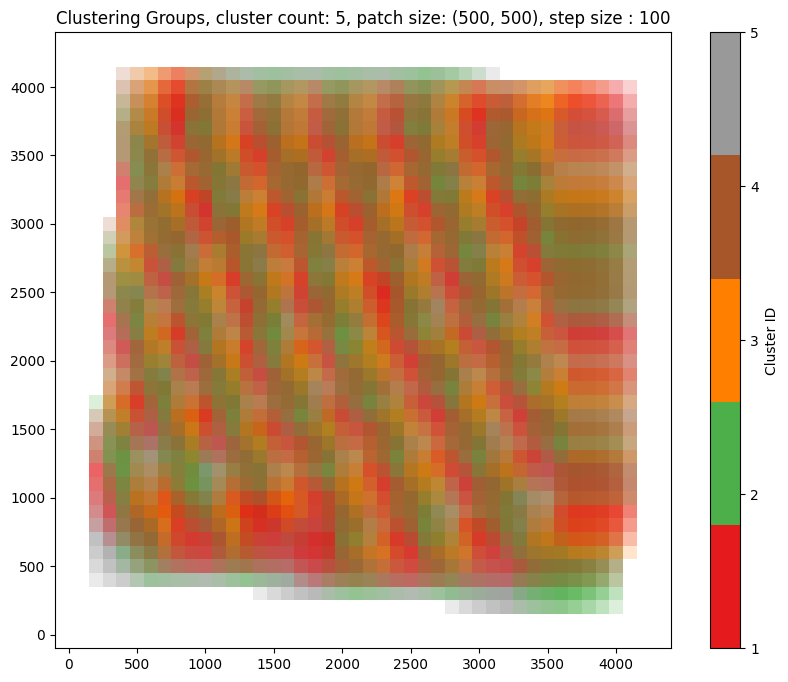

In [8]:
chip_width  = 500
chip_height = 500
step_size   = 100
window_size = (chip_width, chip_height)
img_array   = np.array(imgdata[0])

imstack_grid, com_grid = utils.custom_subimages(img_array, step_size, window_size)
n_clusters = 5
utils.agglo_clustering(imstack_grid, n_clusters, com_grid, window_size, step_size)

## Spectral Clustering  

Number of subimages removed due to size mismatch: 231
Number of subimages removed due to NaNs: 160


/Users/gguinan/anaconda3/envs/code_test/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


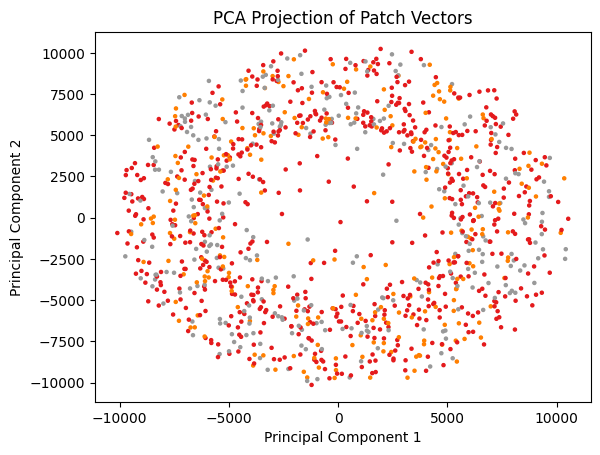

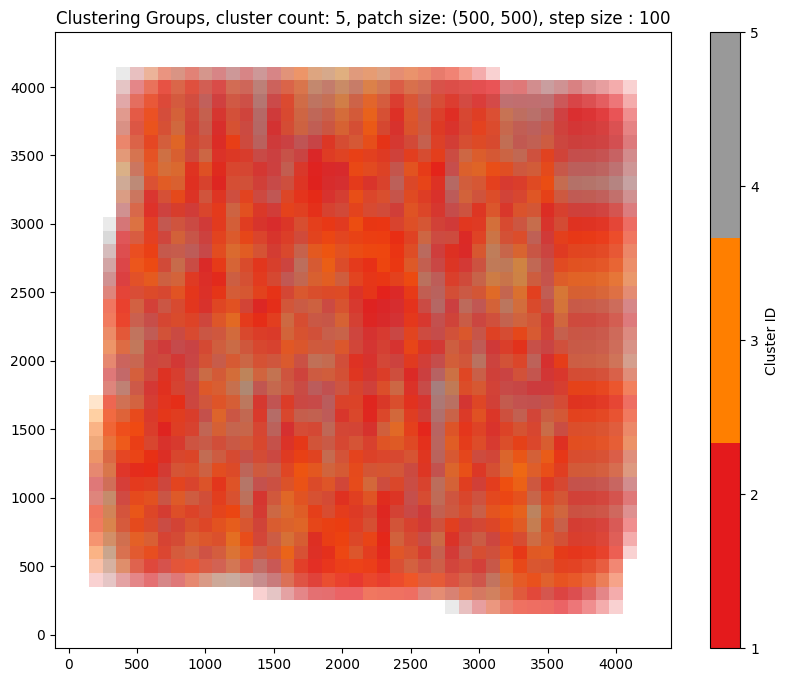

In [9]:
chip_width  = 500
chip_height = 500
step_size   = 100
window_size = (chip_width, chip_height)
img_array   = np.array(imgdata[0])

imstack_grid, com_grid = utils.custom_subimages(img_array, step_size, window_size)
n_clusters = 5
utils.spectral_clustering(imstack_grid, n_clusters, com_grid, window_size, step_size)

Number of subimages removed due to size mismatch: 1173
Number of subimages removed due to NaNs: 5474


/Users/gguinan/anaconda3/envs/code_test/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


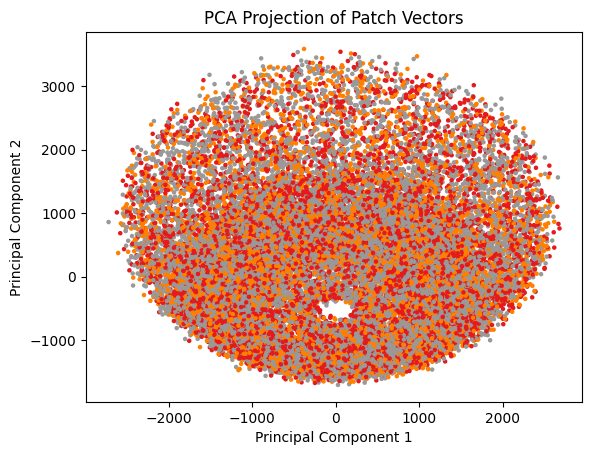

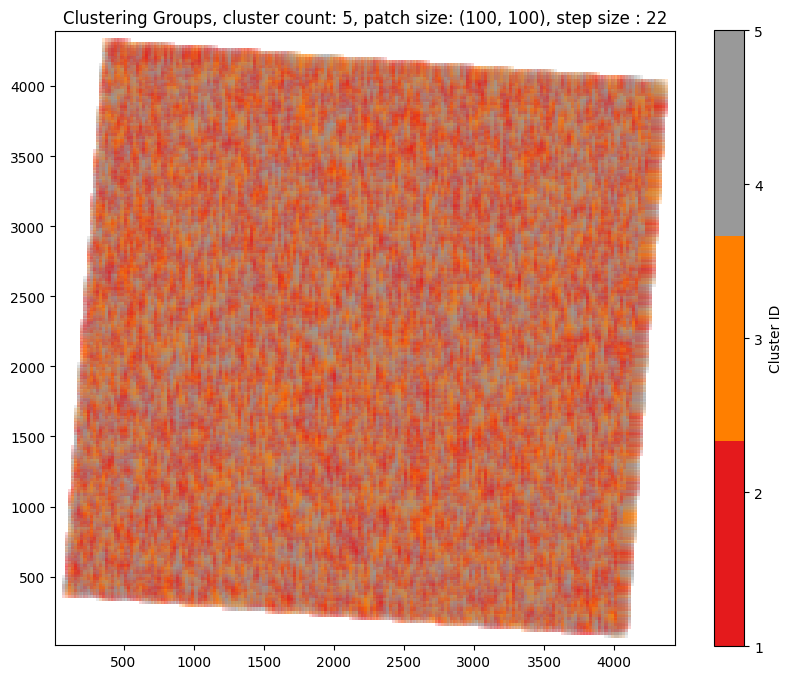

In [12]:
chip_width  = 100
chip_height = 100
step_size   = 22
window_size = (chip_width, chip_height)
img_array   = np.array(imgdata[0])

imstack_grid, com_grid = utils.custom_subimages(img_array, step_size, window_size)
n_clusters = 5
utils.spectral_clustering(imstack_grid, n_clusters, com_grid, window_size, step_size)